# Steps to Perform Linear Regression

## Import Libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

## Create or Load the Dataset

In [5]:
diabete = load_diabetes()

df = pd.DataFrame(diabete.data, columns = diabete.feature_names)
df['target'] = diabete.target

X = df[['bmi']]
y = df['target']
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [7]:
y.shape

(442,)

## Split the Data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [10]:
X_train.shape

(309, 1)

In [11]:
y_train.shape

(309,)

## Train the Linear Regression Model

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Make Predictions

In [42]:
y_pred = model.predict(X_test)
print("Predicted Values", y_pred)
print("True Values", y_test.to_numpy())

Predicted Values [144.90793957 187.52115034 147.03860011 202.4357741  131.05864608
 126.797325   319.6221037  196.04379249  61.81217859 166.21454495
 118.27468285  93.77208666  90.57609585 165.14921469  95.9027472
 156.62657253 221.61171895 238.65700325 178.99850818 208.82775572
 189.65181087 108.68671042 102.29472881 173.67185684 194.97846222
 165.14921469 209.89308599 133.18930661  77.79213262 129.99331581
 242.91832433 114.01336177 165.14921469 144.90793957 190.71714114
 228.00370056 120.40534338 118.27468285 120.40534338  93.77208666
  82.0534537  121.47067365 128.92798554 118.27468285 106.55604989
 116.14402231 115.07869204 101.22939854  67.13882993 152.36525146
 208.82775572  82.0534537  168.34520549 110.81737096 133.18930661
 215.21973733 105.49071962 212.02374652 133.18930661  96.96807747
 181.12916872 191.78247141 204.56643464 106.55604989  86.31477477
 169.41053576 139.58128823 126.797325   117.20935258 138.51595796
 133.18930661 181.12916872 129.99331581 140.6466185   90.576

## Evaluate the Model

In [17]:
mse = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print('MSE = ', mse)
print('R2 Squared = ', R2)

MSE =  3884.936720961032
R2 Squared =  0.2803417492440603


## Visualize the Results

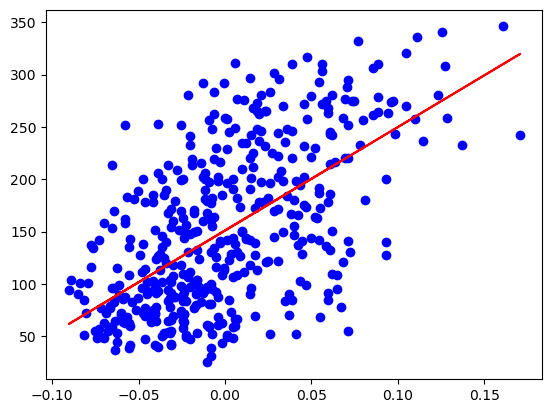

In [19]:
plt.scatter(X, y, c = 'blue', label = 'Original Data')

y_p = model.predict(X)

plt.plot(X, y_p, c = 'r', label = 'Predicted Line')

plt.show()

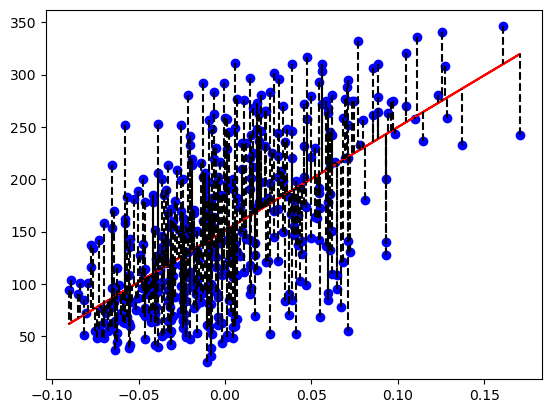

In [23]:
plt.scatter(X, y, c = 'blue', label = 'Original Data')

y_p = model.predict(X)

plt.plot(X, y_p, c = 'r', label = 'Predicted Line')

for i in range(len(df)):
    plt.plot([df['bmi'][i], df['bmi'][i]], [df['target'][i], y_p[i]], 'k--', linewidth=1.5)  # Vertical error lines

plt.show()